<a href="https://colab.research.google.com/github/tiya3009/tiya/blob/main/Turkey_Earthquake_tweet_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd;

In [47]:
data=pd.read_csv("/content/dataset.csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[0
  'Kahramanmaraş türkoğlu ilçesi şekeroba köyü çağrı sokak no 4 çadır yatak ısıtıcı ölen insanlae için de kefen ihtiyacı var  iletişim:05435379496']
 [1
  'Teyitli, ses var, köpekler tepki veriyor.  Her şey var, sadece iki adet #ekskavatör lazım…  Ürgen paşa mah Atatürk cad Gül Apt 87/6  Nasrettin -Müzehher Maruf Ayda - mehmet Altay   Gassan Cilli 05322271102']
 [2
  '0539 693 27 99 bu arkadaş Kahramanmaraş’ta çadır yokmuş 20 aylık bebeği var yakın olan konumla bilgisi olan varmı yakında çadırken olur çadır getirecek olur arabasının yakıtı bitmiş askerlik arkadaşımdır kendisi']
 [3
  'Babamın yaşadığı yere henüz yardım ulaşmamış şarjlari çok az güvenligi olmayan bir alandalar kar yağıyor hipotermi gecirebilirler iletişim kurduk ateş yakamıyolar.Erzakları da yok  Kalaycik mahallesi Kalaycik sokak no:33 Islahiye/Gaziantep Elif koyuncuoglu  0539 248 9403']
 [4
  "Samsun Atakum'da 18 adet yeni eşyalı daire vardır. 8 aylık kira ve ısıtma masrafları ödenmiştir. Ulaşım için destek sağlana

In [48]:
data.drop('Unnamed: 0',axis='columns',inplace=True)
data.head()

,Tweets,Class
0,Kahramanmaraş türkoğlu ilçesi şekeroba köyü ça...,1.0
1,"Teyitli, ses var, köpekler tepki veriyor. Her...",1.0
2,0539 693 27 99 bu arkadaş Kahramanmaraş’ta çad...,1.0
3,Babamın yaşadığı yere henüz yardım ulaşmamış ş...,1.0
4,Samsun Atakum'da 18 adet yeni eşyalı daire var...,1.0


In [49]:
data.groupby('Class').describe()

Tweets                                                               
       count unique                                                top freq
Class                                                                      
0.0      200    192  Bir var bir yok  Onlar öğrenci tam anlamı ile ...    2
1.0      299    272  Defne belediyesi Koçören mahallesi yukarı Koçö...    4

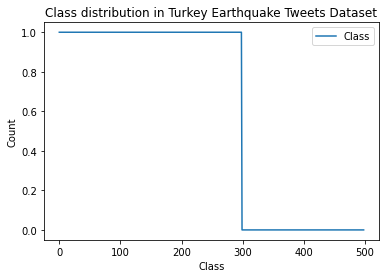

In [50]:
data.plot(kind='line')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution in Turkey Earthquake Tweets Dataset")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.Tweets,data.Class, test_size = 0.25)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [54]:
x_test_count = v.transform(x_test)
model.score(x_test_count,y_test)

0.968

In [57]:
tweets = [
    "Tüm imkanlarımızla kardeşlerimizin yanında olmaya var gücümüzle devam ediyoruz",
    "Depremzede kardeşlerimizin yaralarını sarmak, yüklerini hafifletmek, mahzun yüzlerini tebessüm ettirmek için binlerce görevli ve gönüllümüzle çalışmayı sürdürüyoruz. "
]

tweets_count = v.transform(tweets)
model.predict(tweets_count)

array([0., 1.])